This dataset recorded from operating sounds of drill. This data is particular time-series data and contains normal sounds (each signal is 60 seconds) and anomalous sounds (each signal is 10 seconds) of the drill.

In this notebook, data has been analyzed.

In [1]:
import numpy as np
import os
import IPython
import matplotlib.pyplot as plt
from python_speech_features import mfcc,logfbank
from scipy.io import wavfile
import librosa
import librosa.display
import wave

plt.style.use("Solarize_Light2")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

/home/inovako/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
IMAGE_PATH = "./img"

normal_signal_file = './dataset/normal/normal_env1_drill001_002.wav'
abnormal_signal_file = './dataset/abnormal/abnormal_env1_drill001_009.wav'

In [3]:
def load_sound_file(path, mono=False, channel=0):
    signal, sr = librosa.load(path, sr=None, mono=mono)
    if signal.ndim < 2:
        sound_file = signal, sr
    else:
        sound_file = signal[channel, :], sr

    return sound_file

In [4]:
normal_signal, sr_n = load_sound_file(normal_signal_file)
abnormal_signal, sr_a = load_sound_file(abnormal_signal_file)

print(
    f"Normal signal has a {normal_signal.shape} shape. At {sr_n} Hz, these are {normal_signal.shape[0] / sr_n:.0f}s signals."
)

print(
    f"Abnormal signal has a {abnormal_signal.shape} shape. At {sr_a} Hz, these are {abnormal_signal.shape[0] / sr_a:.0f}s signals."
)

Normal signal has a (2880000,) shape. At 48000 Hz, these are 60s signals.
Abnormal signal has a (480000,) shape. At 48000 Hz, these are 10s signals.


# Wave Forms

The first thing we can do is to plot the waveforms of a normal and abnormal signals next to each other:

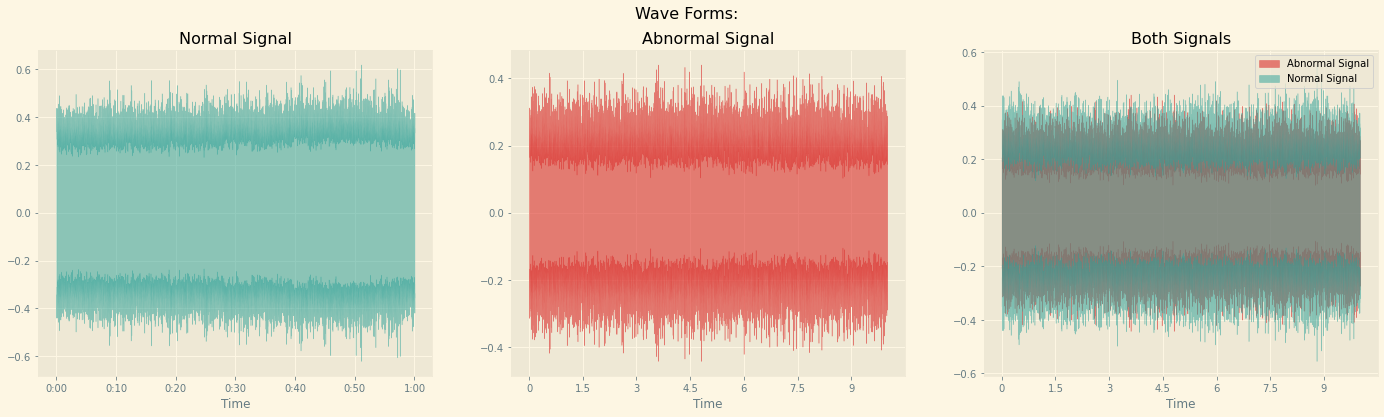

In [5]:
fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
librosa.display.waveshow(
    normal_signal,
    sr=sr_n,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Drill001_008 - Normal Signal",
)
plt.title("Normal Signal")

plt.subplot(1, 3, 2)
librosa.display.waveshow(
    abnormal_signal,
    sr=sr_a,
    alpha=0.6,
    color=colors[5],
    linewidth=0.5,
    label="Drill001_009 - Abnormal Signal",
)
plt.title("Abnormal Signal")

plt.subplot(1, 3, 3)
librosa.display.waveshow(
    abnormal_signal,
    sr=sr_a,
    alpha=0.6,
    color=colors[5],
    linewidth=0.5,
    label="Abnormal Signal",
)
librosa.display.waveshow(
    normal_signal[:480000],
    sr=sr_a,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Normal Signal",
)
plt.title("Both Signals")

fig.suptitle("Wave Forms:", fontsize=16)
plt.legend()
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "wave_forms.svg"), format="svg")

Each normal signal is 60 seconds long and each abnormal signal is 10 seconds long. From the wave forms, it’s not easy to seperate between these two signals. 

# Short Time Fourier Transform

After investige data in the time domain, now have a look in the frequency domain.

The parameter n_fft of this function is the length of the window signal (frame size) while the hop_length is the frame increment. Our signals are 10s long: with n_fft = 2048 and at a sampling rate of 16 kHz, this corresponds to a physical duration of 2048/16000 = 128 ms. Let's display the FFT of the first 128ms window (by limiting the signal span and by setting a hop length greater than n_fft):

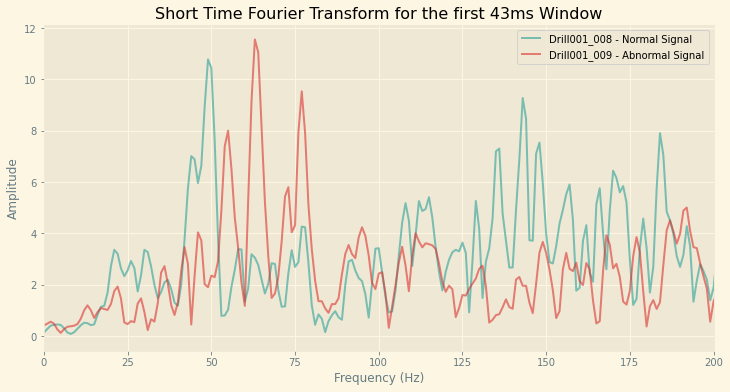

In [6]:
n_fft = 2048

normal_stft = np.abs(
    librosa.stft(normal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1)
)
abnormal_stft = np.abs(
    librosa.stft(abnormal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1)
)

fig = plt.figure(figsize=(12, 6))
plt.plot(
    normal_stft, color=colors[1], alpha=0.6, label="Drill001_008 - Normal Signal"
)
plt.plot(
    abnormal_stft, color=colors[5], alpha=0.6, label="Drill001_009 - Abnormal Signal"
)
plt.title(
    f"Short Time Fourier Transform for the first {n_fft / sr_a * 1000:.0f}ms Window"
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(0, 200)
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "stft.svg"), format="svg")

# Spectrograms (dB scale)

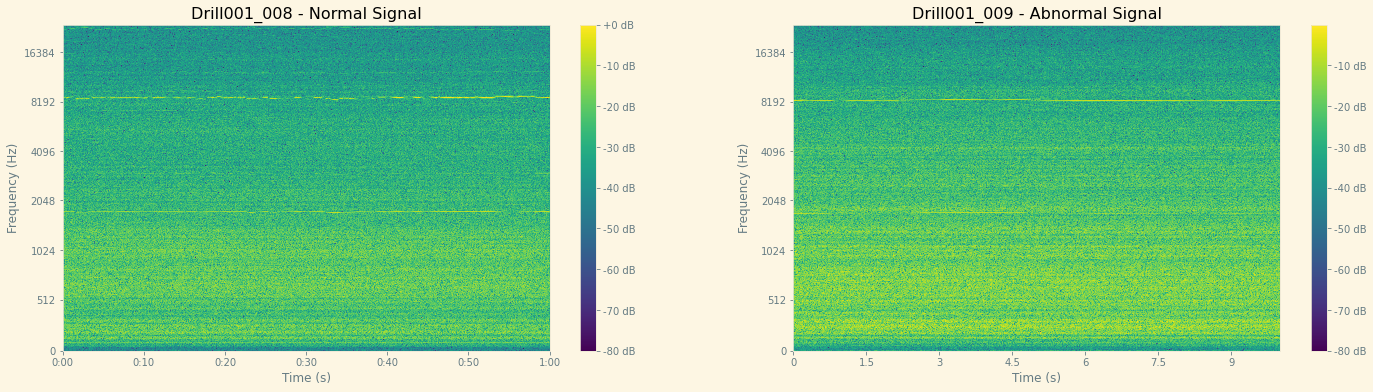

The spectrograms have a (1025, 5626) shape.


In [8]:
hop_length = 512
normal_stft = np.abs(librosa.stft(normal_signal, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(
    librosa.stft(abnormal_signal, n_fft=n_fft, hop_length=hop_length)
)
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    normal_spectrogram, sr=sr_n, x_axis="time", y_axis="mel", cmap="viridis"
)
plt.title("Drill001_008 - Normal Signal")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    abnormal_spectrogram, sr=sr_a, x_axis="time", y_axis="mel", cmap="viridis"
)
plt.title("Drill001_009 - Abnormal Signal")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "spectrograms.svg"), format="svg")

print(f"The spectrograms have a {normal_spectrogram.shape} shape.")

# Mel-Spectrograms

/home/inovako/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.09164131  0.08814561 -0.08124375 ...  0.11885333 -0.16102648
 -0.0764637 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
/home/inovako/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass y=[ 0.12854469 -0.05500519 -0.06624293 ... -0.08194387 -0.0363878
  0.00783145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys


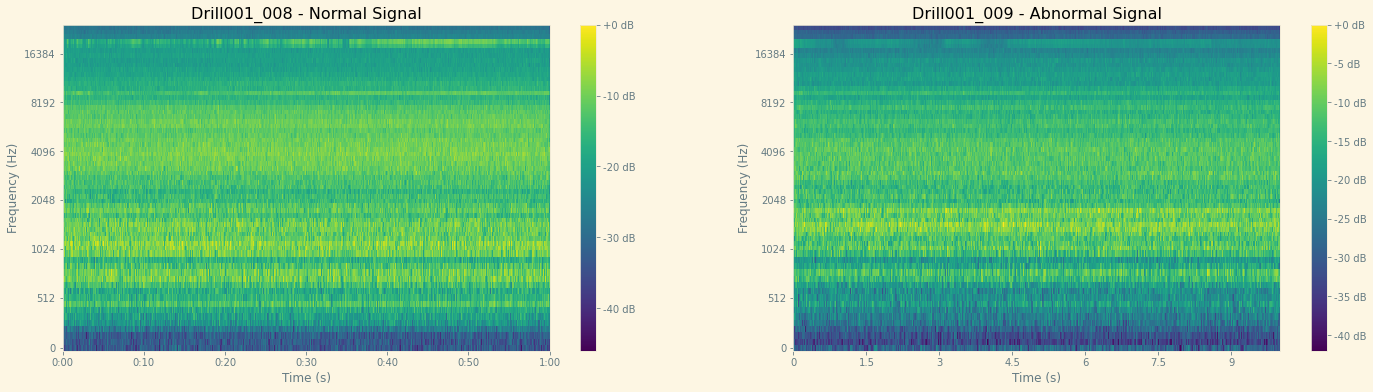

The mel-spectrograms have a (64, 5626) shape.


In [10]:
n_mels = 64
normal_mel_spectrogram = librosa.feature.melspectrogram(
    normal_signal, sr=sr_n, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
normal_mel_spectrogram = librosa.power_to_db(normal_mel_spectrogram, ref=np.max)
abnormal_mel_spectrogram = librosa.feature.melspectrogram(
    abnormal_signal, sr=sr_a, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
abnormal_mel_spectrogram = librosa.power_to_db(abnormal_mel_spectrogram, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    normal_mel_spectrogram,
    sr=sr_n,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap="viridis",
)
plt.title("Drill001_008 - Normal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    abnormal_mel_spectrogram,
    sr=sr_n,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap="viridis",
)
plt.title("Drill001_009 - Abnormal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "mel_spectrograms.svg"), format="svg")

print(f"The mel-spectrograms have a {normal_mel_spectrogram.shape} shape.")

# Multiple Frames of Spectrograms

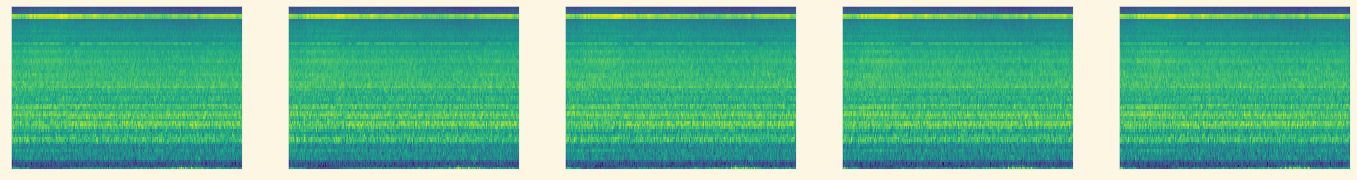

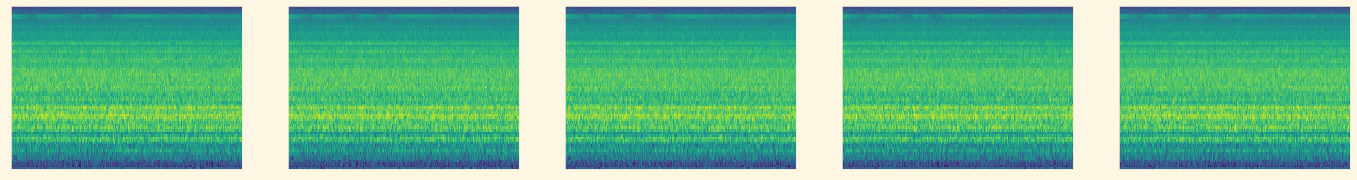

The features have a (934, 320) shape.


In [23]:
frames = 5
dims = frames * n_mels

features_vector_size = normal_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = normal_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr_n,
        hop_length=hop_length,
        cmap="viridis",
    )
fig.savefig(os.path.join(IMAGE_PATH, "normal_frames.svg"), format="svg")

features_vector_size = abnormal_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = abnormal_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr_n,
        hop_length=hop_length,
        cmap="viridis",
    )

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "abnormal_frames.svg"), format="svg")

print(f"The features have a {features.shape} shape.")



Conclusion

The Mel spectrogram looks like a good candidate to extract interesting features that we could feed to a neural network. We will know build two types of feature extractor based on this analysis and feed them to different type of architectures:

    Extracting features into a tabular dataset that we will feed to an autoencoder neural network.